<a href="https://colab.research.google.com/github/R-Damanhuri/Machine-Learning/blob/main/Caregiver-Recommendation/Model-Development/Newest-Model/14_6_Model_Used_2_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Data

In [2]:
#Clone repository
!git clone https://github.com/R-Damanhuri/Machine-Learning.git

Cloning into 'Machine-Learning'...
remote: Enumerating objects: 247, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 247 (delta 8), reused 1 (delta 1), pack-reused 219
Receiving objects: 100% (247/247), 5.30 MiB | 10.70 MiB/s, done.
Resolving deltas: 100% (60/60), done.


In [3]:
# Read excel file with sheet name
cbf_dataset = pd.read_excel('/content/Machine-Learning/Caregiver-Recommendation/Data-Collecting/CareGiver_Recommender_Dataset.xlsx',
              sheet_name=['Dataset Lansia','Dataset Caregiver'])

## Lansia

In [4]:
# Get DataFrame from Dict
lansia_df = cbf_dataset.get('Dataset Lansia')

In [5]:
lansia_df.shape

(2000, 22)

In [6]:
lansia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   id                                       2000 non-null   int64 
 1   Mobilitas                                2000 non-null   int64 
 2   Penyakit lain                            2000 non-null   int64 
 3   Hipertensi                               2000 non-null   int64 
 4   Diabetes                                 2000 non-null   int64 
 5   Reumatik                                 2000 non-null   int64 
 6   Penyakit jantung                         2000 non-null   int64 
 7   Asma                                     2000 non-null   int64 
 8   Stroke                                   2000 non-null   int64 
 9   Mengurus rumah                           2000 non-null   int64 
 10  Membantu pergerakan dan aktivitas fisik  2000 non-null   int

In [7]:
lansia_df.head()

,id,Mobilitas,Penyakit lain,Hipertensi,Diabetes,Reumatik,Penyakit jantung,Asma,Stroke,Mengurus rumah,...,Mengecek kesehatan rutin secara mandiri,Mendampingi dan menjaga,Memasangkan alat medis khusus,Memeriksakan rutin ke dokter,Indonesia,Inggris,Jawa,Sunda,Melayu,Kota
0,1,1,0,0,0,0,0,0,0,3,...,2,4,1,1,1,1,1,1,0,KABUPATEN PEMALANG
1,2,2,1,1,0,0,0,0,0,3,...,2,4,3,3,0,0,0,1,0,KABUPATEN NDUGA
2,3,1,0,1,0,1,0,0,1,4,...,4,1,4,4,1,0,1,1,0,KOTA MAKASSAR
3,4,1,0,0,0,0,0,0,1,3,...,1,1,3,1,0,0,0,1,1,KABUPATEN BANYUWANGI
4,5,5,0,0,0,0,0,0,0,1,...,3,2,1,2,1,1,0,0,1,KABUPATEN ACEH UTARA


## Caregiver

In [8]:
# Get DataFrame from Dict
caregiver_df = cbf_dataset.get('Dataset Caregiver')

In [9]:
caregiver_df.shape

(2000, 22)

In [10]:
caregiver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   id                                       2000 non-null   int64  
 1   Jenis kelamin                            2000 non-null   int64  
 2   Pendidikan terakhir                      2000 non-null   int64  
 3   Lama pengalaman (tahun)                  2000 non-null   int64  
 4   Jumlah lansia pernah dirawat             2000 non-null   int64  
 5   Umur                                     2000 non-null   int64  
 6   Keahlian                                 2000 non-null   float64
 7   Mengurus rumah                           2000 non-null   int64  
 8   Membantu pergerakan dan aktivitas fisik  2000 non-null   int64  
 9   Membantu konsumsi obat dan makanan       2000 non-null   int64  
 10  Mengecek kesehatan rutin secara mandiri  2000 no

In [11]:
caregiver_df

,id,Jenis kelamin,Pendidikan terakhir,Lama pengalaman (tahun),Jumlah lansia pernah dirawat,Umur,Keahlian,Mengurus rumah,Membantu pergerakan dan aktivitas fisik,Membantu konsumsi obat dan makanan,...,Memasangkan alat medis khusus,Memeriksakan rutin ke dokter,Indonesia,Inggris,Jawa,Sunda,Melayu,Kota,Gaji,Matching
0,1,1,5,12,4,33,0.14,0,0,1,...,1,1,1,1,0,0,0,KOTA BANDAR LAMPUNG,1060000,0.618680
1,2,1,5,13,12,36,0.43,1,0,1,...,1,0,1,1,1,0,1,KABUPATEN BOJONEGORO,830000,0.604606
2,3,0,1,1,1,24,0.71,0,1,1,...,0,1,1,1,0,0,0,KOTA SORONG,1590000,0.675971
3,4,0,2,4,0,39,0.86,1,1,1,...,1,1,1,0,0,1,0,KABUPATEN KEPULAUAN SULA,1820000,0.646133
4,5,0,1,2,0,35,0.00,1,0,0,...,0,1,1,0,0,1,0,KABUPATEN SERDANG BEDAGAI,1930000,0.956317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,0,1,0,0,21,1.00,1,0,1,...,0,1,1,0,0,1,0,KABUPATEN DOGIYAI,840000,0.914220
1996,1997,0,1,3,1,31,0.00,1,1,1,...,0,0,0,1,1,0,1,KABUPATEN MAMBERAMO TENGAH,1730000,0.977283
1997,1998,0,1,6,6,28,0.43,0,1,1,...,1,1,0,0,0,0,0,KABUPATEN JAYAPURA,620000,0.677816
1998,1999,0,1,6,2,31,0.29,0,1,1,...,0,0,1,1,1,1,1,KABUPATEN KUTAI KARTANEGARA,1690000,1.000000


## Kota

In [12]:
prov_kota = pd.read_csv("/content/Machine-Learning/Caregiver-Recommendation/Data-Collecting/Prov_Kota.csv")
# Membuat kolom baru dengan penggabungan province dan city
prov_kota['concat'] = prov_kota.apply(lambda row: row['kota'] + ' ' + row['provinsi'], axis=1)

In [13]:
kota_mapping = prov_kota.set_index('kota')['provinsi'].to_dict()

In [14]:
kota_mapping

{'KABUPATEN ACEH SELATAN': 'ACEH',
 'KABUPATEN ACEH TENGGARA': 'ACEH',
 'KABUPATEN ACEH TIMUR': 'ACEH',
 'KABUPATEN ACEH TENGAH': 'ACEH',
 'KABUPATEN ACEH BARAT': 'ACEH',
 'KABUPATEN ACEH BESAR': 'ACEH',
 'KABUPATEN PIDIE': 'ACEH',
 'KABUPATEN ACEH UTARA': 'ACEH',
 'KABUPATEN SIMEULUE': 'ACEH',
 'KABUPATEN ACEH SINGKIL': 'ACEH',
 'KABUPATEN BIREUEN': 'ACEH',
 'KABUPATEN ACEH BARAT DAYA': 'ACEH',
 'KABUPATEN GAYO LUES': 'ACEH',
 'KABUPATEN ACEH JAYA': 'ACEH',
 'KABUPATEN NAGAN RAYA': 'ACEH',
 'KABUPATEN ACEH TAMIANG': 'ACEH',
 'KABUPATEN BENER MERIAH': 'ACEH',
 'KABUPATEN PIDIE JAYA': 'ACEH',
 'KOTA BANDA ACEH': 'ACEH',
 'KOTA SABANG': 'ACEH',
 'KOTA LHOKSEUMAWE': 'ACEH',
 'KOTA LANGSA': 'ACEH',
 'KOTA SUBULUSSALAM': 'ACEH',
 'KABUPATEN TAPANULI TENGAH': 'SUMATRA UTARA',
 'KABUPATEN TAPANULI UTARA': 'SUMATRA UTARA',
 'KABUPATEN TAPANULI SELATAN': 'SUMATRA UTARA',
 'KABUPATEN NIAS': 'SUMATRA UTARA',
 'KABUPATEN LANGKAT': 'SUMATRA UTARA',
 'KABUPATEN KARO': 'SUMATRA UTARA',
 'KABUPATEN DE

In [15]:
prov_kota.shape

(514, 3)

In [16]:
prov_kota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   provinsi  514 non-null    object
 1   kota      514 non-null    object
 2   concat    514 non-null    object
dtypes: object(3)
memory usage: 12.2+ KB


In [17]:
prov_kota

,provinsi,kota,concat
0,ACEH,KABUPATEN ACEH SELATAN,KABUPATEN ACEH SELATAN ACEH
1,ACEH,KABUPATEN ACEH TENGGARA,KABUPATEN ACEH TENGGARA ACEH
2,ACEH,KABUPATEN ACEH TIMUR,KABUPATEN ACEH TIMUR ACEH
3,ACEH,KABUPATEN ACEH TENGAH,KABUPATEN ACEH TENGAH ACEH
4,ACEH,KABUPATEN ACEH BARAT,KABUPATEN ACEH BARAT ACEH
...,...,...,...
509,PAPUA BARAT,KABUPATEN TAMBRAUW,KABUPATEN TAMBRAUW PAPUA BARAT
510,PAPUA BARAT,KABUPATEN MAYBRAT,KABUPATEN MAYBRAT PAPUA BARAT
511,PAPUA BARAT,KABUPATEN MANOKWARI SELATAN,KABUPATEN MANOKWARI SELATAN PAPUA BARAT
512,PAPUA BARAT,KABUPATEN PEGUNUNGAN ARFAK,KABUPATEN PEGUNUNGAN ARFAK PAPUA BARAT


In [18]:
caregiver_df['Kota'].value_counts()

KOTA SOLOK                  10
KABUPATEN LOMBOK TENGAH     10
KABUPATEN NGAWI              9
KABUPATEN PASANGKAYU         9
KABUPATEN LUWU               8
                            ..
KABUPATEN MOROWALI UTARA     1
KOTA BEKASI                  1
KABUPATEN BIAK NUMFOR        1
KOTA MAGELANG                1
KABUPATEN MEMPAWAH           1
Name: Kota, Length: 503, dtype: int64

In [19]:
caregiver_df[caregiver_df['Kota']=="KABUPATEN NGAWI"]

,id,Jenis kelamin,Pendidikan terakhir,Lama pengalaman (tahun),Jumlah lansia pernah dirawat,Umur,Keahlian,Mengurus rumah,Membantu pergerakan dan aktivitas fisik,Membantu konsumsi obat dan makanan,...,Memasangkan alat medis khusus,Memeriksakan rutin ke dokter,Indonesia,Inggris,Jawa,Sunda,Melayu,Kota,Gaji,Matching
118,119,1,5,2,1,31,1.00,1,1,0,...,0,0,0,0,1,1,0,KABUPATEN NGAWI,510000,0.889372
119,120,1,3,7,1,31,0.14,1,0,1,...,1,1,1,0,1,0,0,KABUPATEN NGAWI,1540000,1.000000
134,135,1,5,2,2,25,0.71,0,0,1,...,1,0,1,1,1,1,0,KABUPATEN NGAWI,1650000,0.805179
327,328,1,5,1,1,39,0.14,0,0,1,...,0,0,1,0,1,0,0,KABUPATEN NGAWI,1760000,0.785513
669,670,1,5,4,3,33,0.43,1,0,0,...,1,0,1,1,1,0,0,KABUPATEN NGAWI,880000,0.583016
808,809,1,3,5,5,27,0.29,1,1,0,...,1,1,0,0,0,1,0,KABUPATEN NGAWI,910000,0.833757
880,881,1,5,0,0,26,0.71,0,0,1,...,1,1,0,1,0,1,0,KABUPATEN NGAWI,1390000,1.000000
887,888,1,2,0,0,24,0.43,1,0,1,...,0,1,0,0,0,1,1,KABUPATEN NGAWI,1890000,0.637941
1420,1421,0,1,6,5,27,0.71,0,1,0,...,0,0,1,0,0,1,1,KABUPATEN NGAWI,820000,0.893833


# Feature Selection

In [20]:
#Separating numeric, city, and target features

lansia_num = lansia_df.loc[:, ~lansia_df.columns.isin(['id','Kota'])].copy()
caregiver_num = caregiver_df.loc[:, ~caregiver_df.columns.isin(['id', 'Matching','Kota'])].copy()

lansia_city = lansia_df.loc[:, lansia_df.columns == 'Kota'].copy()
caregiver_city = caregiver_df.loc[:, caregiver_df.columns == 'Kota'].copy()

y_matching = caregiver_df.loc[:, caregiver_df.columns == 'Matching'].copy()

In [21]:
lansia_num.columns

Index(['Mobilitas', 'Penyakit lain', 'Hipertensi', 'Diabetes', 'Reumatik',
       'Penyakit jantung', 'Asma', 'Stroke', 'Mengurus rumah',
       'Membantu pergerakan dan aktivitas fisik',
       'Membantu konsumsi obat dan makanan',
       'Mengecek kesehatan rutin secara mandiri', 'Mendampingi dan menjaga',
       'Memasangkan alat medis khusus', 'Memeriksakan rutin ke dokter',
       'Indonesia', 'Inggris', 'Jawa', 'Sunda', 'Melayu'],
      dtype='object')

In [22]:
caregiver_num.columns

Index(['Jenis kelamin', 'Pendidikan terakhir', 'Lama pengalaman (tahun)',
       'Jumlah lansia pernah dirawat', 'Umur', 'Keahlian', 'Mengurus rumah',
       'Membantu pergerakan dan aktivitas fisik',
       'Membantu konsumsi obat dan makanan',
       'Mengecek kesehatan rutin secara mandiri', 'Mendampingi dan menjaga',
       'Memasangkan alat medis khusus', 'Memeriksakan rutin ke dokter',
       'Indonesia', 'Inggris', 'Jawa', 'Sunda', 'Melayu', 'Gaji'],
      dtype='object')

In [23]:
lansia_city.head()

,Kota
0,KABUPATEN PEMALANG
1,KABUPATEN NDUGA
2,KOTA MAKASSAR
3,KABUPATEN BANYUWANGI
4,KABUPATEN ACEH UTARA


In [24]:
caregiver_city.head()

,Kota
0,KOTA BANDAR LAMPUNG
1,KABUPATEN BOJONEGORO
2,KOTA SORONG
3,KABUPATEN KEPULAUAN SULA
4,KABUPATEN SERDANG BEDAGAI


In [25]:
caregiver_city

,Kota
0,KOTA BANDAR LAMPUNG
1,KABUPATEN BOJONEGORO
2,KOTA SORONG
3,KABUPATEN KEPULAUAN SULA
4,KABUPATEN SERDANG BEDAGAI
...,...
1995,KABUPATEN DOGIYAI
1996,KABUPATEN MAMBERAMO TENGAH
1997,KABUPATEN JAYAPURA
1998,KABUPATEN KUTAI KARTANEGARA


In [26]:
caregiver_city['Provinsi'] = caregiver_city['Kota'].map(kota_mapping)
# caregiver_city['concat'] = caregiver_city.apply(lambda row: row['Kota'] + ' ' + row['Provinsi'], axis=1)

In [27]:
caregiver_city

,Kota,Provinsi
0,KOTA BANDAR LAMPUNG,LAMPUNG
1,KABUPATEN BOJONEGORO,JAWA TIMUR
2,KOTA SORONG,PAPUA BARAT
3,KABUPATEN KEPULAUAN SULA,MALUKU UTARA
4,KABUPATEN SERDANG BEDAGAI,SUMATRA UTARA
...,...,...
1995,KABUPATEN DOGIYAI,PAPUA
1996,KABUPATEN MAMBERAMO TENGAH,PAPUA
1997,KABUPATEN JAYAPURA,PAPUA
1998,KABUPATEN KUTAI KARTANEGARA,KALIMANTAN TIMUR


# Preprocessing

## Numeric

In [28]:
#Create and fit scaler
#Then transform the numeric data

scaler = StandardScaler()
lansia_num_scaled = scaler.fit_transform(lansia_num)
caregiver_num_scaled = scaler.fit_transform(caregiver_num)

In [29]:
lansia_num_scaled

array([[-1.42256822, -0.33518212, -0.79959006, ...,  0.98905984,
         1.04292026, -0.98412598],
       [-0.70264503,  2.98345271,  1.25064086, ..., -1.01106117,
         1.04292026, -0.98412598],
       [-1.42256822, -0.33518212,  1.25064086, ...,  0.98905984,
         1.04292026, -0.98412598],
       ...,
       [ 0.01727816, -0.33518212, -0.79959006, ..., -1.01106117,
         1.04292026, -0.98412598],
       [ 0.01727816, -0.33518212, -0.79959006, ..., -1.01106117,
         1.04292026, -0.98412598],
       [ 0.73720134, -0.33518212, -0.79959006, ..., -1.01106117,
        -0.95884608,  1.01613007]])

In [30]:
caregiver_num_scaled

array([[ 0.81394741,  1.33180301,  1.50560429, ..., -1.0502616 ,
        -0.98412598, -0.49512321],
       [ 0.81394741,  1.33180301,  1.72607644, ..., -1.0502616 ,
         1.01613007, -1.0234384 ],
       [-1.2285806 , -1.19833807, -0.91958932, ..., -1.0502616 ,
        -0.98412598,  0.72229874],
       ...,
       [-1.2285806 , -1.19833807,  0.18277141, ..., -1.0502616 ,
        -0.98412598, -1.50581314],
       [-1.2285806 , -1.19833807,  0.18277141, ...,  0.95214374,
         1.01613007,  0.952001  ],
       [-1.2285806 , -0.5658028 , -0.91958932, ..., -1.0502616 ,
        -0.98412598,  0.97497123]])

In [31]:
lansia_input = lansia_num_scaled
caregiver_input = caregiver_num_scaled

## City

In [32]:
list_caregiver_city = caregiver_city['Provinsi'].tolist()
list_caregiver_city = [kota.lower() for kota in list_caregiver_city]

In [33]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(prov_kota["provinsi"])
vocab_size = len(tokenizer.word_index) + 1

In [34]:
vocab_size

29

In [35]:
city_seq = tokenizer.texts_to_sequences(prov_kota["provinsi"])

max_seq_length = max(len(seq) for seq in city_seq)
max_seq_length

2

#Model City

In [36]:
inlayer_city = tf.keras.layers.Input(shape=(max_seq_length,))
embedding_layer_lansia = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=64)
embedded = embedding_layer_lansia(inlayer_city)
flatten = tf.keras.layers.Flatten()(embedded)

In [37]:
# Specify the inputs and output of the model
model_city = tf.keras.Model(inlayer_city, flatten)

In [38]:
cost_fn = tf.keras.losses.MeanSquaredError()
opt = keras.optimizers.Adam(learning_rate=0.0001)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 embedding (Embedding)       (None, 2, 64)             1856      
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
Total params: 1,856
Trainable params: 1,856
Non-trainable params: 0
_________________________________________________________________


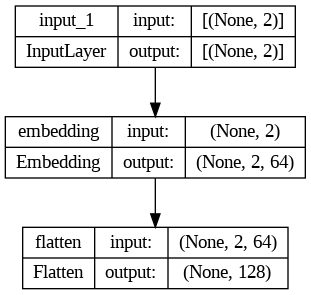

In [39]:
model_city.compile(optimizer=opt,loss=cost_fn)
model_city.summary()
plot_model(model_city, show_shapes=True, to_file='/content/model_city.png')

# Model Numeric

In [40]:
n_outputs = 40
n_lansia_features = lansia_input.shape[1]
n_caregiver_features = caregiver_input.shape[1]

# tf.random.set_seed(1)

In [41]:
#Lansia Numerical

#Tingkat 1
inlayer_lansia = tf.keras.layers.Input(shape=(n_lansia_features))

#Tingkat 2
final_vu = tf.keras.layers.Dense(n_outputs, activation = 'relu')(inlayer_lansia)


In [42]:
#Caregiver numerical

#Tingkat 1
inlayer_caregiver = tf.keras.layers.Input(shape=(n_caregiver_features))

#Tingkat 2
final_vm = tf.keras.layers.Dense(n_outputs, activation = 'relu')(inlayer_caregiver)

In [43]:
# Compute the dot product of the vectors vu and vm

dot = tf.keras.layers.Dot(axes=1, normalize=True)([final_vu, final_vm])

afterDot_NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    tf.keras.layers.Dense(64, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.05)),
    tf.keras.layers.Dense(n_outputs, activation = 'relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

output= afterDot_NN(dot)

In [44]:
# Specify the inputs and output of the model
model = tf.keras.Model([inlayer_lansia, inlayer_caregiver], output)

In [45]:
model.compile(optimizer=opt,
              loss=cost_fn,
              metrics = [tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.RootMeanSquaredError()])

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 20)]         0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 19)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 40)           840         ['input_2[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 40)           800         ['input_3[0][0]']                
                                                                                            

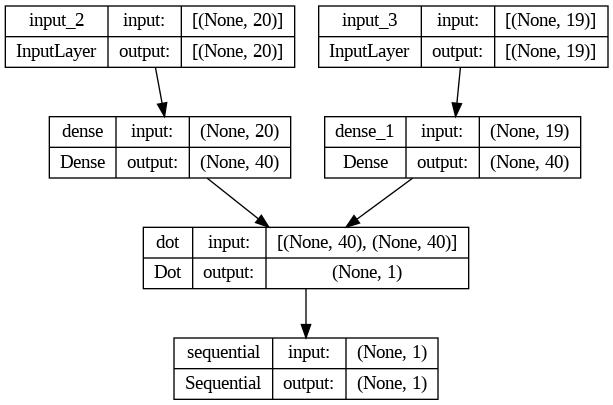

In [46]:
model.summary()
plot_model(model, show_shapes=True, to_file='/content/caregiver_model.png')

# Training and Validation

In [47]:
caregiver_train, caregiver_test= train_test_split(caregiver_input,random_state = 42, train_size=0.8)
lansia_train, lansia_test= train_test_split(lansia_input,random_state = 42, train_size=0.8)

y_train, y_test= train_test_split(y_matching, random_state = 42, train_size=0.8)

In [48]:
print("lansia train: ", lansia_train.shape)
print("lansia test: ", lansia_test.shape)
print("caregiver train: ", caregiver_train.shape)
print("caregiver test: ", caregiver_test.shape)

print("\ny train: ", y_train.shape)
print("y test: ", y_test.shape)

lansia train:  (1600, 20)
lansia test:  (400, 20)
caregiver train:  (1600, 19)
caregiver test:  (400, 19)

y train:  (1600, 1)
y test:  (400, 1)


In [49]:
# tf.random.set_seed(1)

history = model.fit([lansia_train, caregiver_train], y_train, epochs=70, batch_size = 64, validation_data = ([lansia_test, caregiver_test], y_test))

Epoch 1/70
25/25 [==============================] - 5s 34ms/step - loss: 3.4474 - mean_absolute_error: 0.3008 - root_mean_squared_error: 0.3331 - val_loss: 3.3890 - val_mean_absolute_error: 0.3017 - val_root_mean_squared_error: 0.3342
Epoch 2/70
25/25 [==============================] - 0s 11ms/step - loss: 3.3298 - mean_absolute_error: 0.2921 - root_mean_squared_error: 0.3253 - val_loss: 3.2735 - val_mean_absolute_error: 0.2936 - val_root_mean_squared_error: 0.3268
Epoch 3/70
25/25 [==============================] - 0s 15ms/step - loss: 3.2162 - mean_absolute_error: 0.2840 - root_mean_squared_error: 0.3181 - val_loss: 3.1619 - val_mean_absolute_error: 0.2856 - val_root_mean_squared_error: 0.3197
Epoch 4/70
25/25 [==============================] - 0s 10ms/step - loss: 3.1062 - mean_absolute_error: 0.2755 - root_mean_squared_error: 0.3105 - val_loss: 3.0534 - val_mean_absolute_error: 0.2768 - val_root_mean_squared_error: 0.3118
Epoch 5/70
25/25 [==============================] - 0s 10ms/

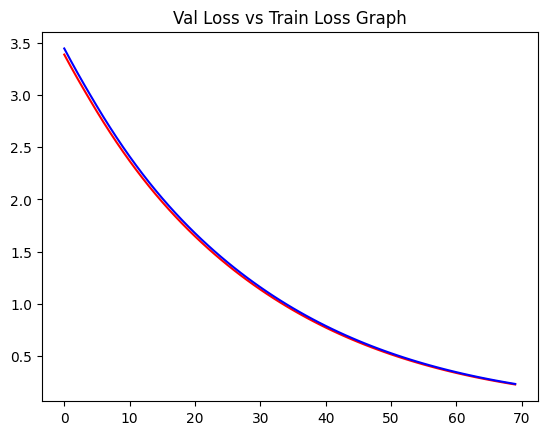

In [50]:
# summarize history for loss



plt.plot(history.history['val_loss'], color='r', label='Val Loss')
plt.plot(history.history['loss'], color='b', label='Train Loss')
plt.title('Val Loss vs Train Loss Graph')
plt.show()

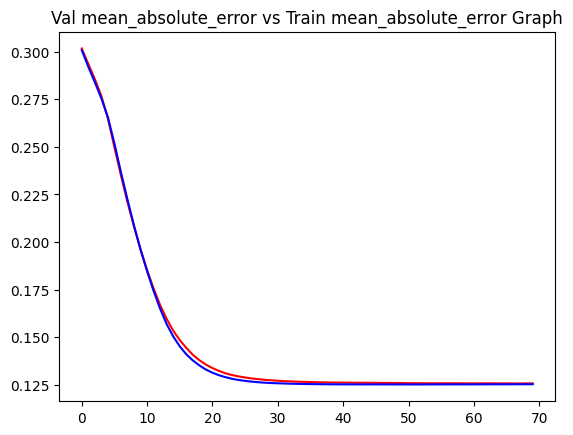

In [51]:
plt.plot(history.history['val_mean_absolute_error'], color='r', label='Val mean_absolute_error')
plt.plot(history.history['mean_absolute_error'], color='b', label='Train mean_absolute_error')
plt.title('Val mean_absolute_error vs Train mean_absolute_error Graph')
plt.show()

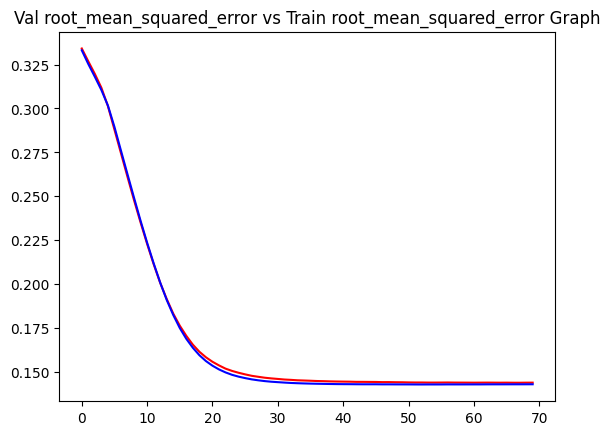

In [52]:
plt.plot(history.history['val_root_mean_squared_error'], color='r', label='Val root_mean_squared_error')
plt.plot(history.history['root_mean_squared_error'], color='b', label='Train root_mean_squared_error')
plt.title('Val root_mean_squared_error vs Train root_mean_squared_error Graph')
plt.show()

#Test

In [53]:
new_id = 2001
new_Mobilitas = 2
new_Penyakitlain = 0
new_Hipertensi = 0
new_Diabetes = 1
new_Reumatik = 0
new_Penyakitjantung = 0
new_Asma = 0
new_Stroke = 1
new_Mengurusrumah = 1
new_Membantupergerakandanaktivitasfisik = 4
new_Membantukonsumsiobatdanmakanan = 4
new_Mengecekkesehatanrutinsecaramandiri = 1
new_Mendampingidanmenjaga = 4
new_Memasangkanalatmediskhusus = 1
new_Memeriksakanrutinkedokter = 1
new_Indonesia = 0
new_Inggris = 0
new_Jawa = 1
new_Sunda = 0
new_Melayu = 0

lansia_vec = np.array([new_Mobilitas, new_Penyakitlain, new_Hipertensi,
                        new_Diabetes, new_Reumatik, new_Penyakitjantung, new_Asma,
                        new_Stroke, new_Mengurusrumah, new_Membantupergerakandanaktivitasfisik,
                        new_Membantukonsumsiobatdanmakanan, new_Mengecekkesehatanrutinsecaramandiri,
                        new_Mendampingidanmenjaga, new_Memasangkanalatmediskhusus,
                        new_Memeriksakanrutinkedokter, new_Indonesia, new_Inggris, new_Jawa,
                        new_Sunda, new_Melayu])

In [54]:
#For Numeric Input
caregiver_vecs = np.array(caregiver_input)
lansia_vecs = [lansia_vec] * len(caregiver_vecs)

scaled_item_vecs = scaler.fit_transform(caregiver_vecs)
scaled_user_vecs = scaler.fit_transform(lansia_vecs)

In [55]:
predictions = model.predict([scaled_user_vecs, scaled_item_vecs])

63/63 [==============================] - 1s 2ms/step


In [56]:
predictions

array([[0.80778885],
       [0.8078501 ],
       [0.80536526],
       ...,
       [0.80656594],
       [0.80557173],
       [0.8060276 ]], dtype=float32)

In [57]:
# For City Input

new_lansia_city = "KABUPATEN NGAWI"
province = kota_mapping.get(new_lansia_city)

# new_lansia_city = new_lansia_city + " " + province
new_lansia_city = province.lower()

In [58]:
#Concate list caregiver city and new lansia city
for_similarity = list_caregiver_city
for_similarity.append(new_lansia_city)

In [59]:
#New_lansia city in the end of concatenated list
for_similarity[-1]

'jawa timur'

In [60]:
for_similarity_seq = tokenizer.texts_to_sequences(for_similarity)
for_similarity_input = pad_sequences(for_similarity_seq, maxlen=max_seq_length, padding="post")

In [61]:
print("for_similarity_seq: ", for_similarity_seq)
print("for_similarity_input: ", for_similarity_input)

for_similarity_seq:  [[16], [1, 9], [10, 2], [13, 5], [4, 5], [13], [7, 9], [25, 26], [4, 8], [28], [12], [1, 9], [14], [1, 9], [3, 8], [1, 6], [18], [1, 2], [1, 9], [4, 2], [4, 8], [4, 5], [1, 6], [22, 23], [7, 6], [1, 6], [28], [10, 2], [13], [17], [4, 5], [16], [4, 5], [3, 2], [4, 5], [4, 5], [1, 6], [19], [7, 6], [3, 15], [1, 2], [1, 6], [3, 5], [13, 5], [1, 6], [1, 2], [7, 8], [1, 2], [3, 15], [12], [1, 9], [7, 8], [3, 5], [4, 2], [20], [1, 6], [19], [4, 5], [3, 2], [4, 5], [10], [10], [22, 23], [1, 2], [4, 8], [4, 5], [12], [3, 8], [7, 2], [1, 6], [1, 2], [11], [12], [11], [4, 2], [28], [1, 6], [11], [11], [1, 9], [20], [3, 8], [27], [14], [4, 8], [10, 2], [3, 8], [17], [3, 15], [1, 9], [4, 8], [1, 9], [7, 9], [4, 2], [1, 9], [1, 9], [11], [21], [7, 6], [1, 6], [3, 5], [10], [7, 2], [3, 8], [4, 8], [7, 6], [1, 9], [1, 2], [1, 9], [1, 2], [1, 9], [1, 2], [7, 8], [4, 5], [12], [21], [7, 9], [1, 9], [1, 9], [1, 9], [3, 8], [1, 6], [7, 5], [3, 8], [12], [7, 6], [4, 8], [4, 2], [13, 5

In [62]:
#Use pretrain model to calculate city similarity
embeddings = []
embeddings = model_city.predict(for_similarity_input)

63/63 [==============================] - 0s 2ms/step


In [63]:
embeddings.shape

(2001, 128)

In [64]:
#City similarity output is between -1 and 0. -1 is same word.
#Store output as city weight
city_weight = []
for i in range(len(embeddings)-1):
  const = tf.keras.losses.cosine_similarity(embeddings[-1],embeddings[i],axis=-1)
  city_weight.append(const.numpy())

In [65]:
city_weight

[-0.14341411,
 -1.0,
 -0.12575053,
 0.11787576,
 0.030961474,
 0.060291987,
 -0.5858647,
 -0.087957926,
 0.026056014,
 0.050693467,
 -0.10785591,
 -1.0,
 -0.051137134,
 -1.0,
 -0.026558489,
 -0.3920034,
 -0.045114517,
 -0.5566147,
 -1.0,
 -0.094888225,
 0.026056014,
 0.030961474,
 -0.3920034,
 0.10034177,
 0.04760658,
 -0.3920034,
 0.050693467,
 -0.12575053,
 0.060291987,
 0.027663074,
 0.030961474,
 -0.14341411,
 0.030961474,
 -0.15107714,
 0.030961474,
 0.030961474,
 -0.3920034,
 -0.021282896,
 0.04760658,
 0.035323452,
 -0.5566147,
 -0.3920034,
 -0.022514433,
 0.11787576,
 -0.3920034,
 -0.5566147,
 -0.0024292935,
 -0.5566147,
 0.035323452,
 -0.10785591,
 -1.0,
 -0.0024292935,
 -0.022514433,
 -0.094888225,
 0.029792147,
 -0.3920034,
 -0.021282896,
 0.030961474,
 -0.15107714,
 0.030961474,
 -0.046906997,
 -0.046906997,
 0.10034177,
 -0.5566147,
 0.026056014,
 0.030961474,
 -0.10785591,
 -0.026558489,
 -0.1325838,
 -0.3920034,
 -0.5566147,
 -0.053146575,
 -0.10785591,
 -0.053146575,
 -

In [66]:
#Final matching score calculate by multiply y_p and minus city weight in the same index
final_score = []
for i in range(2000):
  skor = predictions[i] * -city_weight[i]
  final_score.append(skor[0])

In [67]:
#Get recommended caregiver ids
sorted_index = np.argsort(-np.array(final_score), axis=0).reshape(-1)  # dimulai dari 0
ids = [int(idx + 1) for idx in sorted_index]  # plus 1 karena id caregiver tidak dimulai dari 0

In [68]:
for id in ids[:20]:
  print(caregiver_df[caregiver_df['id']==id].values)

[[80 1 5 11 3 33 0.57 0 0 1 0 1 1 0 0 1 1 0 1 'KABUPATEN TULUNGAGUNG'
  1010000 0.5623515948579823]]
[[2 1 5 13 12 36 0.43 1 0 1 0 0 1 0 1 1 1 0 1 'KABUPATEN BOJONEGORO'
  830000 0.6046064678231587]]
[[120 1 3 7 1 31 0.14 1 0 1 0 0 1 1 1 0 1 0 0 'KABUPATEN NGAWI' 1540000
  1.0]]
[[328 1 5 1 1 39 0.14 0 0 1 0 0 0 0 1 0 1 0 0 'KABUPATEN NGAWI' 1760000
  0.7855131866935322]]
[[182 1 5 1 1 33 0.57 1 0 1 0 1 0 0 0 0 1 0 0 'KABUPATEN NGANJUK' 1970000
  0.5823051519099143]]
[[254 1 3 14 13 39 0.0 0 0 1 1 0 1 0 0 0 1 1 1 'KABUPATEN PROBOLINGGO'
  700000 1.0]]
[[1287 1 4 15 13 36 0.86 1 1 1 0 0 1 0 0 1 1 1 0 'KABUPATEN BONDOWOSO'
  820000 0.6976644139204887]]
[[811 1 5 5 4 38 0.14 0 0 1 1 1 0 1 0 1 1 0 0 'KABUPATEN PACITAN' 1960000
  0.92248018460711]]
[[1268 1 3 12 1 37 0.0 0 0 1 0 1 1 1 0 0 0 1 1 'KABUPATEN SITUBONDO'
  840000 0.8051525392370331]]
[[641 1 4 2 2 28 0.57 1 1 1 0 0 1 1 1 0 0 0 1 'KABUPATEN JOMBANG' 1410000
  0.6685081077087404]]
[[983 1 5 0 0 21 0.43 1 1 1 0 0 0 1 1 1 0 0 0 'KAB

# Save Model

In [69]:
saved_model_path = "/content/caregiver_model.h5"
model.save(saved_model_path)

In [70]:
saved_model_path = "/content/city_model.h5"
model_city.save(saved_model_path)